# Download Financial Statements for Russell 1000 companies

In order to avoid overwhelming the server and possible failures, download in 4 chunks by 
grouping into sectors. 

Save each group manually befor downloading next batch.

In [1]:
import pickle
from yahoofinancials import YahooFinancials
import pandas as pd
import numpy as np

import re

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.options.display.float_format = '{:.0f}'.format

In [3]:
data_location = '/mnt/data/projects/TS1/data/R1000/Yahoo'

In [4]:
# Get list of stocks from Russell 1000 Wikipedia page

In [5]:
url = 'https://en.wikipedia.org/wiki/Russell_1000_Index'
tables = pd.read_html(url)

In [6]:
stock_list = tables[2]
stock_list.columns = ['Company', 'Ticker', 'Sector', 'Industry']

Yahoo recognises tickers where . is substituted by -. Eg. BRK.B is BRK-B in Yahoo.

Also, are duplicate holdings representing different share classes. Eg. GOOG and GOOGL.

Following is to resolve these.

In [103]:
# Identify tickers with full stop

X = []

for t in stock_list['Ticker']:
    if re.search("\.",t):
       print(t)
       X.append(t.split(".")[0])

# See if holding exists without the extension

print(" ")

for t in X:
   print(stock_list[stock_list['Ticker'] == t]['Ticker'])
       

BRK.B
BF.A
BF.B
HEI.A
LEN.B
UHAL.B
 
Series([], Name: Ticker, dtype: object)
Series([], Name: Ticker, dtype: object)
Series([], Name: Ticker, dtype: object)
436    HEI
Name: Ticker, dtype: object
536    LEN
Name: Ticker, dtype: object
902    UHAL
Name: Ticker, dtype: object


We can remove HEI.B, LEN.B, BF.B and UHAL.B as they are essentially duplicates
There are two tickers for Google, so remove one of them. ie. GOOGL.
Convert BF.A to BF-A and BRK.B to BRK-B so that they are recognised by yahoo.

Problem encountered while trying to download CAT and DOCS so drop these from stock_list.


In [105]:
stock_list.loc[stock_list['Ticker'] == "BRK.B","Ticker"] = "BRK-B"
stock_list.loc[stock_list['Ticker'] == "BF.A","Ticker"] = "BF-A"

stock_list.drop(stock_list[stock_list['Ticker'] == "HEI.A"].index,axis=0, inplace=True)
stock_list.drop(stock_list[stock_list['Ticker'] == "BF.B"].index,axis=0, inplace=True)
stock_list.drop(stock_list[stock_list['Ticker'] == "LEN.B"].index,axis=0, inplace=True)
stock_list.drop(stock_list[stock_list['Ticker'] == "UHAL.B"].index,axis=0, inplace=True)
stock_list.drop(stock_list[stock_list['Ticker'] == "GOOGL"].index,axis=0, inplace=True)
stock_list.drop(stock_list[stock_list['Ticker'] == "CAT"].index,axis=0, inplace=True)
stock_list.drop(stock_list[stock_list['Ticker'] == "DOCS"].index,axis=0, inplace=True)

In [78]:
stock_list[stock_list['Ticker'] == "BF-A"]

,Company,Ticker,Sector,Industry,TIcker
152,Brown–Forman (Class A),BF-A,Consumer Staples,Distillers & Vintners,BF-A


In [ ]:
## Download Data in groups

In [6]:
stock_list.groupby('Sector')['Sector'].count().sort_values()

Sector
Energy                     38
Utilities                  40
Communication Services     49
Consumer Staples           56
Materials                  58
Real Estate                66
Health Care               117
Consumer Discretionary    122
Information Technology    148
Financials                151
Industrials               161
Name: Sector, dtype: int64

In [83]:
def download_data(ticker_list):

  master_data = {}

  cash_statements = {}
  balance_statements = {}
  income_statements = {}
  company_profile = {}

  for sector in ticker_list:
    print(sector)
    yahoo_financials = YahooFinancials(ticker_list[sector])
    print('Getting cash statements - {}'.format(sector))
    cash_statements[sector] = yahoo_financials.get_financial_stmts('annual', 'cash')
    print('Getting balance statements - {}'.format(sector)) 
    balance_statements[sector] = yahoo_financials.get_financial_stmts('annual', 'balance')
    print('Getting income statements - {}'.format(sector)) 
    income_statements[sector] = yahoo_financials.get_financial_stmts('annual', 'income')
    print('Getting Company profile data - {}'.format(sector))
    company_profile[sector] = yahoo_financials.get_stock_profile_data()
  
  master_data['cash'] = cash_statements
  master_data['balance'] = balance_statements
  master_data['income'] = income_statements
  master_data['profile'] = company_profile

  return master_data

In [90]:
def save_data(group,master_data):
    
  with open(data_location + '/Yahoo_balance_statements_' + group + '.pkl','wb') as f:
    pickle.dump(master_data['balance'], f)
    
  with open(data_location + '/Yahoo_income_statements_' + group + '.pkl','wb') as f:
    pickle.dump(master_data['income'], f)
    
  with open(data_location + '/Yahoo_cash_statements_' + group + '.pkl','wb') as f:
    pickle.dump(master_data['cash'], f)

  with open(data_location + '/Yahoo_company_profile_' + group + '.pkl','wb') as f:
    pickle.dump(master_data['profile'], f)


### Group 1

In [84]:
cash_statements = {}
balance_statements = {}
income_statements = {}
company_profile = {}

ticker_list = {}

ticker_list['Energy'] = list(stock_list[stock_list['Sector'] == 'Energy' ]['Ticker'])
ticker_list['Utilities'] = list(stock_list[stock_list['Sector'] == 'Utilities' ]['Ticker'])
ticker_list['Communication Services'] = list(stock_list[stock_list['Sector'] == 'Communication Services']['Ticker'])

master_data = download_data(ticker_list)

Energy
Getting cash statements - Energy
Getting balance statements - Energy
Getting income statements - Energy
Getting Company profile data - Energy
Utilities
Getting cash statements - Utilities
Getting balance statements - Utilities
Getting income statements - Utilities
Getting Company profile data - Utilities
Communication Services
Getting cash statements - Communication Services
Getting balance statements - Communication Services
Getting income statements - Communication Services
Getting Company profile data - Communication Services


In [91]:
save_data('g1',master_data)

### Group 2

In [93]:
cash_statements = {}
balance_statements = {}
income_statements = {}
company_profile = {}

ticker_list = {}

ticker_list['Consumer Staples'] = list(stock_list[stock_list['Sector'] == 'Consumer Staples' ]['Ticker'])
ticker_list['Materials'] = list(stock_list[stock_list['Sector'] == 'Materials' ]['Ticker'])
#ticker_list['Health Care'] = list(stock_list[stock_list['Sector'] == 'Health Care' ]['Ticker'])
ticker_list['Real Estate'] = list(stock_list[stock_list['Sector'] == 'Real Estate' ]['Ticker'])

master_data = download_data(ticker_list)

Consumer Staples
Getting cash statements - Consumer Staples
Getting balance statements - Consumer Staples
Getting income statements - Consumer Staples
Getting Company profile data - Consumer Staples
Materials
Getting cash statements - Materials
Getting balance statements - Materials
Getting income statements - Materials
Getting Company profile data - Materials
Real Estate
Getting cash statements - Real Estate
Getting balance statements - Real Estate
Getting income statements - Real Estate
Getting Company profile data - Real Estate


In [94]:
save_data('g2',master_data)

### Group 3

In [99]:
cash_statements = {}
balance_statements = {}
income_statements = {}
company_profile = {}

ticker_list = {}

ticker_list['Industrials'] = list(stock_list[stock_list['Sector'] == 'Industrials' ]['Ticker'])
ticker_list['Information Technology'] = list(stock_list[stock_list['Sector'] == 'Information Technology' ]['Ticker'])

master_data = download_data(ticker_list)

Industrials
Getting cash statements - Industrials
Getting balance statements - Industrials
Getting income statements - Industrials
Getting Company profile data - Industrials


	Continuing extraction...


Information Technology
Getting cash statements - Information Technology
Getting balance statements - Information Technology
Getting income statements - Information Technology
Getting Company profile data - Information Technology


In [100]:
save_data('g3',master_data)

In [7]:
yahoo_financials = YahooFinancials(['F'])

X1 = yahoo_financials.get_financial_stmts('annual', 'cash')

X2 = yahoo_financials.get_financial_stmts('annual', 'balance')

X3 = yahoo_financials.get_financial_stmts('annual', 'income')

X4 = yahoo_financials.get_stock_profile_data()


In [9]:
X4['F']

{'address1': 'One American Road',
 'city': 'Dearborn',
 'state': 'MI',
 'zip': '48126-1899',
 'country': 'United States',
 'phone': '313 322 3000',
 'website': 'https://www.ford.com',
 'industry': 'Auto Manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'longBusinessSummary': 'Ford Motor Company develops, delivers, and services a range of Ford trucks, commercial cars and vans, sport utility vehicles, and Lincoln luxury vehicles worldwide. It operates through Ford Blue, Ford Model e, and Ford Pro; Ford Next; and Ford Credit segments. The company sells Ford and Lincoln vehicles, service parts, and accessories through distributors and dealers, as well as through dealerships to commercial fleet customers, daily rental car companies, and governments. It also engages in vehicle-related financing and leasing activities to and through automotive dealers. In addition, the company provides retail installment sale contracts for new and used vehicles; and direc

### Group 4

In [106]:
cash_statements = {}
balance_statements = {}
income_statements = {}
company_profile = {}

ticker_list = {}

ticker_list['Consumer Discretionary'] = list(stock_list[stock_list['Sector'] == 'Consumer Discretionary' ]['Ticker'])
ticker_list['Health Care'] = list(stock_list[stock_list['Sector'] == 'Health Care' ]['Ticker'])

master_data = download_data(ticker_list)

Consumer Discretionary
Getting cash statements - Consumer Discretionary
Getting balance statements - Consumer Discretionary
Getting income statements - Consumer Discretionary
Getting Company profile data - Consumer Discretionary
Health Care
Getting cash statements - Health Care
Getting balance statements - Health Care
Getting income statements - Health Care
Getting Company profile data - Health Care


In [107]:
save_data('g4',master_data)

# Download Share Prices

In [ ]:
ticker_list = {}
#ticker_list['Communication Services'] = list(stock_list[stock_list['Sector'] == 'Communication Services']['Ticker'])
#ticker_list['Consumer Staples'] = list(stock_list[stock_list['Sector'] == 'Consumer Staples' ]['Ticker'])
#ticker_list['Industrials'] = list(stock_list[stock_list['Sector'] == 'Industrials' ]['Ticker'])
#ticker_list['Information Technology'] = list(stock_list[stock_list['Sector'] == 'Information Technology' ]['Ticker'])
#ticker_list['Health Care'] = list(stock_list[stock_list['Sector'] == 'Health Care' ]['Ticker'])
ticker_list['Consumer Discretionary'] = list(stock_list[stock_list['Sector'] == 'Consumer Discretionary' ]['Ticker'])
ticker_list['Materials'] = list(stock_list[stock_list['Sector'] == 'Materials' ]['Ticker'])
ticker_list['Energy'] = list(stock_list[stock_list['Sector'] == 'Energy' ]['Ticker'])

In [9]:
#yahoo_financials = YahooFinancials(['TSLA','WMT','INTC','F','T','PEP','KO'])

yahoo_financials = YahooFinancials(['BRK-B',])
stock_prices = yahoo_financials.get_stock_profile_data()

In [10]:
stock_prices

{'BRK-B': {'address1': '3555 Farnam Street',
  'city': 'Omaha',
  'state': 'NE',
  'zip': '68131',
  'country': 'United States',
  'phone': '402 346 1400',
  'fax': '402 346 3375',
  'website': 'https://www.berkshirehathaway.com',
  'industry': 'Insurance—Diversified',
  'industryDisp': 'Insurance—Diversified',
  'sector': 'Financial Services',
  'longBusinessSummary': 'Berkshire Hathaway Inc., through its subsidiaries, engages in the insurance, freight rail transportation, and utility businesses worldwide. It provides property, casualty, life, accident, and health insurance and reinsurance; and operates railroad systems in North America. The company also generates, transmits, stores, and distributes electricity from natural gas, coal, wind, solar, hydroelectric, nuclear, and geothermal sources; operates natural gas distribution and storage facilities, interstate pipelines, liquefied natural gas facilities, and compressor and meter stations; and holds interest in coal mining assets. In

In [118]:
df = pd.DataFrame(stock_prices['INTC']['prices'])
df = df.drop('date',axis=1).set_index('formatted_date')
df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2010-01-01,22,19,21,19,1509082400,13
2010-02-01,21,19,19,21,1125494400,14
2010-03-01,23,20,21,22,1290896200,15
2010-04-01,24,22,22,23,1550379100,15
2010-05-01,23,20,23,21,1830571300,14


<Axes: xlabel='formatted_date'>

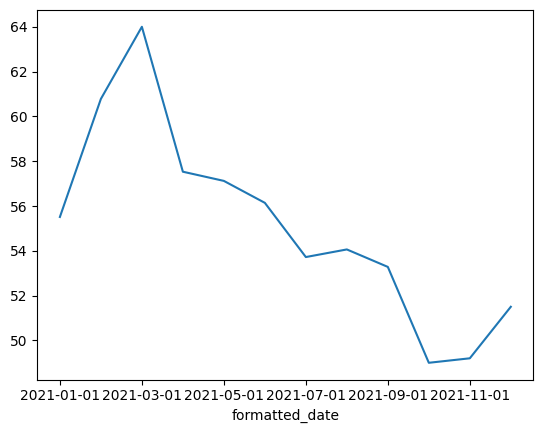

In [123]:
df['2021':]['close'].plot()